In [1]:
from c3s_511_trends import TrendLims1D, assess_trend_consistency

/net/exo/landclim/crezees/conda/envs/esmval2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


# Example A: Reading in station data, resampling and plotting


Loaded datafile ehdb_t2m.nc


/net/exo/landclim/crezees/conda/envs/esmval2/lib/python3.6/site-packages/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)
/net/exo/landclim/crezees/conda/envs/esmval2/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/net/exo/landclim/crezees/conda/envs/esmval2/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from 

Resampled to Y frequency
Creating a plot with label: T2m


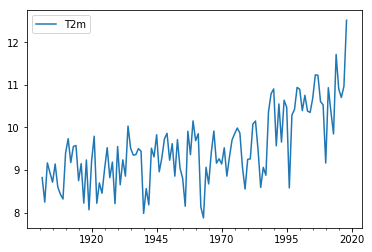

In [2]:
mydat = TrendLims1D('De Bilt T2m')
mydat.load_file('ehdb_t2m.nc')
mydat.resample('Y')
mydat.plot('T2m')

# Example B: Creating artificial data and breakpoint detection

Created an artificial timeseries
Calculated Mann-Kendall test
Calculated linear trend test
Calculated Theil-Sen slope
Resampled to Y frequency
Creating a plot with label: Test data


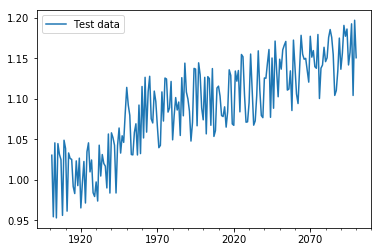

In [3]:
mydat = TrendLims1D('artificial_timeseries')
mydat.create_artificial({'periods' : 200, 'jump_start' : 46, 'jump_length': 200,'jump_magnitude' : 0.05, 'trend_magnitude' : 0.005})
#mydat.subset(slice('1902-01-01','2017-12-31'))
mydat.do_trends()
mydat.resample('Y') # Resample to yearly resolution
mydat.plot(label='Test data')

In [4]:
mydat.get_breakpoints()

This timeseries is Suspect


# Example C: If a trend is present in the data, it needs to be removed before breakpoint detection is applied

In [17]:
mydat = TrendLims1D('artificial_timeseries')
print("Creating test data with no jump")
mydat.create_artificial({'periods' : 200, 'jump_start' : 46, 'jump_length': 200,'jump_magnitude' : 0.0*noise_magnitude, 'trend_magnitude' : 0.1*noise_magnitude, 'noise' : noise_magnitude})
mydat.get_breakpoints()
print("Now removing the trend through subtracting the linear trend.")
mydat.do_trends()
mydat.remove_trend('trend_linear')
mydat.get_breakpoints()

Creating test data with no jump
Created an artificial timeseries
This timeseries is Suspect
Now removing the trend
Calculated Mann-Kendall test
Calculated linear trend test
Calculated Theil-Sen slope
This timeseries is Useful


# Example D: Getting a feeling for behaviour of breakpoint tests

Creating test data with a jump as large as the magnitude of the noise
Created an artificial timeseries
Creating a plot with label: Test data
Calculated Mann-Kendall test
Calculated linear trend test
Calculated Theil-Sen slope
Creating a plot with label: Detrended test data
This timeseries is Suspect


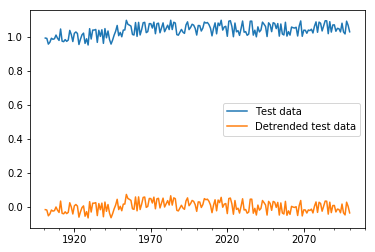

In [31]:
mydat = TrendLims1D('artificial_timeseries')
print("Creating test data with a jump as large as the magnitude of the noise")
mydat.create_artificial({'periods' : 200, 'jump_start' : 46, 'jump_length': 200,'jump_magnitude' : noise_magnitude, 'trend_magnitude' : 0.0*noise_magnitude, 'noise' : noise_magnitude})
mydat.plot("Test data")
mydat.do_trends()
mydat.remove_trend('trend_linear')
mydat.plot('Detrended test data')
mydat.get_breakpoints()

## Pettitt test

 - Should be applied to detrended data
 - Suitable to detect whether or not there is a breakpoint
 - Detects single breakpoint
 
### Pitfalls

 - Applying to non-detrended data will result in a very low p-value (the mean changed for sure, but not due to a breakpoint, rather due to a trend)
 - Given a certain period with elevated values, followed again by basic state, it returns either the start or the end

Created an artificial timeseries
Resampled to Y frequency
Creating a plot with label: Test data
Breakpoint is located at: 80
Pettitt: 81
SNH: 77


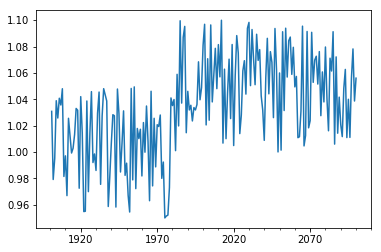

In [7]:
#mydat = TrendLims1D('De Bilt T2M','ehdb_t2m.nc')
jump_start = 80

mydat = TrendLims1D('Artificial data')
mydat.create_artificial({'periods' : 200, 'jump_start' : jump_start, 'jump_length': 200,'jump_magnitude' : 0.05, 'trend_magnitude' : 0.0})
#mydat.subset(slice('1902-01-01','2017-12-31'))
mydat.resample('Y') # Resample to yearly resolution
mydat.plot(label='Test data')
breakpoint_pettitt = pettitt(mydat.data_ts)
breakpoint_snh = snh_test(mydat.data_ts)
print("Breakpoint is located at: {0}".format(jump_start))
print("Pettitt: {0}".format(breakpoint_pettitt))
print("SNH: {0}".format(breakpoint_snh))

## Continue the analysis with calculating linear trend test

In [8]:
mydat.trend_linear() # units are in C/decade
mydat.print_stats()

Calculated linear trend test
{'trend_linear': {'pvalue': 1.0556002216369461e-53,
                  'slope': 0.02883672585420734,
                  'slope_low': 0.02749603331030407,
                  'slope_up': 0.03017741839811061,
                  'stderr': 0.001340692543903271,
                  'trend': 1}}


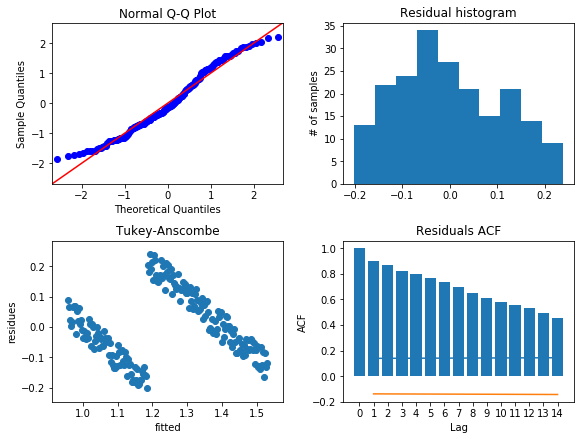

In [9]:
mydat.do_residual_analysis('trend_linear')
pass # dummy statement for preventing image showing up twice

## Now also perform Theil-Sen slope estimator and Mann-Kendall test

In [45]:
mydat.trend_mktest()
mydat.trend_theilsen()
mydat.print_stats()

Calculated Mann-Kendall test
Calculated Theil-Sen slope
{'trend_linear': {'pvalue': 1.260711970521823e-15,
                  'slope': 0.1619501301179658,
                  'slope_low': 0.1445151212995213,
                  'slope_up': 0.1793851389364103,
                  'stderr': 0.017435008818444498,
                  'trend': 1},
 'trend_mannkendall': {'h': True,
                       'p': 9.892087149410145e-13,
                       'trend': 1,
                       'z': 7.131986162666038},
 'trend_theilsen': {'slope': 0.16289997509411347,
                    'slope_low': 0.1320986205120198,
                    'slope_up': 0.1983244484878932,
                    'trend': 1}}


## Check the consistency of the different types of trend analyses

In [46]:
assess_trend_consistency(mydat) # This scoring needs more fine tuning, just a start. Scoring ranges from 0-5 currently.

The different trend tests are fully consistent and indicate a positive trend.
The two different slopes are fully consistent
Final trend score: 5


5

## Now see how consistent the tests are on a shorter timeseries

In [47]:
mydat.reset() # This resets the dataset to a state just after loading
mydat.subset(slice('1985-01-01','2012-12-31'))
mydat.resample('Y')
mydat.do_trends() # This calls all the trend tests
mydat.print_stats()
assess_trend_consistency(mydat)

Subsetted to timeperiod 1985-01-01-2012-12-31
Resampled to Y frequency
Calculated Mann-Kendall test
Calculated linear trend test
Calculated Theil-Sen slope
{'trend_linear': {'pvalue': 0.0170631657419087,
                  'slope': 0.417117501462283,
                  'slope_low': 0.25345508994951904,
                  'slope_up': 0.5807799129750469,
                  'stderr': 0.16366241151276392,
                  'trend': 1},
 'trend_mannkendall': {'h': False,
                       'p': 0.060536002358035024,
                       'trend': 0,
                       'z': 1.876869351772299},
 'trend_theilsen': {'slope': 0.35677635721935763,
                    'slope_low': -0.008025765419006348,
                    'slope_up': 0.7239723205566406,
                    'trend': 0}}
Two out of three trend tests indicate no trend.
The two different slopes are fully consistent
Final trend score: 4


4

- Not fully consistent at the moment, probably related to Issue#3
- Are there datasets where the tests show very different results ? (I would expect so, Theil-Sen is insensitive to outliers, whereas Linear is sensitive to outliers